"""This Script uses the sample-project environment, with the osmnx module updated.
To update the osmnx module within the sample-project environment, I ran the following
conda commands in the terminal:

1)Duplicate the sample-project environment:
conda create --name sample-project_2  --clone sample-project

2)Update osmnx:
conda update osmnx

This script creates a place boundary and downloads the pois within that polygon. Next, it downloads network data:
osm edges and nodes and exports this to a geopackage.
"""

In [1]:
import os
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon
ox.config(log_console=True, use_cache=True)
ox.__version__

'1.1.2'

2021-12-19 23:43:02 Configured OSMnx 1.1.2
2021-12-19 23:43:02 HTTP response caching is on


In [2]:
from IPython.display import display

In [3]:
#For graphing features in jupyter notebook:
%matplotlib inline
# ox.config(log_console=True, use_cache=True)
# ox.__version__

In [4]:
PROJECT_FOLDER = r"/Users/calvindechicago/Documents/GitHub/JWA_2021"
COUNTY_POLYGON = os.path.join(PROJECT_FOLDER, "Data", "osm_county_polygon.gpkg" )

#pois_export = os.path.join(PROJECT_FOLDER, "Data", "From_Public_Sources", "OSM_Data", "singapore_poi.shp")
pois_gpkg = os.path.join(PROJECT_FOLDER, "Data", "From_Public_Sources", "OSM", "poi.gpkg")
network_output = os.path.join(PROJECT_FOLDER, "Data", "network.gpkg")

In [5]:
# get the boundary polygon for Singapore. This polygon will be used to pull network and POIs
county_poly = ox.geocoder.geocode_to_gdf('Multnomah County')
county_proj = ox.project_gdf(county_poly,4326)

2021-12-19 23:43:12 Retrieved response from cache file "cache/8cf5ce47f3c71ddf2f130625dfbd35014712c804.json"
2021-12-19 23:43:12 Created GeoDataFrame with 1 rows from 1 queries
2021-12-19 23:43:12 Projected GeoDataFrame to 4326


<AxesSubplot:>

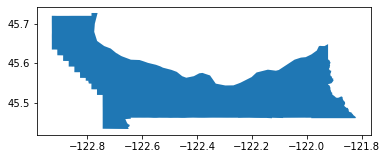

In [6]:
# Plot County geometry
county_proj.plot()

In [7]:
# Export County Geometry

county_proj.to_file(COUNTY_POLYGON, layer='county_poly', driver="GPKG")

In [8]:
# Use this polygon to pull network in osmnx

polygon = county_proj['geometry'].iloc[0]

In [9]:
# PULL NETWORK
G = ox.graph_from_polygon(polygon)
print('Making the graph undirected')
G = G.to_undirected()


2021-12-19 23:43:29 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-19 23:43:29 Projected GeoDataFrame to epsg:4326
2021-12-19 23:43:29 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-19 23:43:29 Projected GeoDataFrame to epsg:4326
2021-12-19 23:43:29 Requesting data within polygon from API in 1 request(s)
2021-12-19 23:43:30 Retrieved response from cache file "cache/3cfeec9a2cb225e9357ef95697aa2431ba87fac8.json"
2021-12-19 23:43:30 Got all network data within polygon from API in 1 request(s)
2021-12-19 23:43:30 Creating graph from downloaded OSM data...
2021-12-19 23:43:40 Created graph with 469799 nodes and 966273 edges
2021-12-19 23:43:45 Added length attributes to graph edges
2021-12-19 23:43:45 Identifying all nodes that lie outside the polygon...
2021-12-19 23:44:04 Created nodes GeoDataFrame from graph
2021-12-19 23:44:17 Created r-tree spatial index for 469799 g

In [ ]:
# Save Network to File

ox.io.save_graph_geopackage(G,filepath= network_output)

# BELOW IS FROM OSMNX ISOCHRONE GUIDE
### https://github.com/gboeing/osmnx-examples/blob/main/notebooks/13-isolines-isochrones.ipynb
## See Also:
### https://pythoncharmers.com/blog/travel-distance-python-with-geopandas-folium-alphashape-osmnx-buffer.html
### http://kuanbutts.com/2017/12/16/osmnx-isochrones/

In [18]:
# configure the place, network type, trip times, and travel speed
place = {"city": "Portland", "state": "Oregon"}
network_type = "walk"
trip_times = [5, 10, 15, 20, 25]  # in minutes
travel_speed = 4.5  # walking speed in km/hour


In [19]:


# download the street network
G = ox.graph_from_place(place, network_type=network_type)



2021-12-20 00:11:36 Pausing 1 seconds before making HTTP GET request
2021-12-20 00:11:37 Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&city=Portland&state=Oregon with timeout=180
2021-12-20 00:11:37 Resolved nominatim.openstreetmap.org to 140.211.167.100
2021-12-20 00:11:37 Downloaded 65.6kB from nominatim.openstreetmap.org
2021-12-20 00:11:37 Saved response to cache file "cache/f97cc98b32e4d843efbca66a3d35ec76bd15716d.json"
2021-12-20 00:11:37 Created GeoDataFrame with 1 rows from 1 queries
2021-12-20 00:11:37 Constructed place geometry polygon(s) to query API
2021-12-20 00:11:37 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-20 00:11:37 Projected GeoDataFrame to epsg:4326
2021-12-20 00:11:37 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-20 00:11:37 Projected GeoDataFrame to epsg:4326
2021-12-20 00:11:37 Requesting da

2021-12-20 00:11:57 Downloaded 42,242.6kB from overpass-api.de
2021-12-20 00:11:59 Saved response to cache file "cache/b8679bf41d275039206aa2832811ff09ce0e026b.json"
2021-12-20 00:11:59 Got all network data within polygon from API in 1 request(s)
2021-12-20 00:11:59 Creating graph from downloaded OSM data...
2021-12-20 00:12:05 Created graph with 283687 nodes and 626750 edges
2021-12-20 00:12:09 Added length attributes to graph edges
2021-12-20 00:12:09 Identifying all nodes that lie outside the polygon...
2021-12-20 00:12:20 Created nodes GeoDataFrame from graph
2021-12-20 00:12:29 Created r-tree spatial index for 283687 geometries
2021-12-20 00:12:32 Identified 278836 geometries inside polygon
2021-12-20 00:12:38 Removed 4851 nodes outside polygon
2021-12-20 00:12:38 Truncated graph by polygon
2021-12-20 00:12:40 Begin topologically simplifying the graph...
2021-12-20 00:12:47 Identified 70004 edge endpoints
2021-12-20 00:13:13 Simplified graph: 278836 to 70004 nodes, 616728 to 19906

In [20]:


# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes['geometry'].unary_union.centroid.xy
center_node = ox.get_nearest_node(G, (y[0], x[0]))
G = ox.project_graph(G)



2021-12-20 00:14:16 Created nodes GeoDataFrame from graph


/Users/calvindechicago/anaconda3/envs/2021_all/lib/python3.10/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


2021-12-20 00:14:17 Created nodes GeoDataFrame from graph
2021-12-20 00:14:19 Created nodes GeoDataFrame from graph
2021-12-20 00:14:26 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-20 00:14:40 Created edges GeoDataFrame from graph
2021-12-20 00:14:48 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-12-20 00:14:54 Created graph from node/edge GeoDataFrames
2021-12-20 00:14:54 Projected graph with 62986 nodes and 182284 edges


In [21]:


# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute



In [22]:


# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)



2021-12-20 00:15:05 Begin plotting the graph...
2021-12-20 00:15:12 Created edges GeoDataFrame from graph
2021-12-20 00:15:19 Created nodes GeoDataFrame from graph


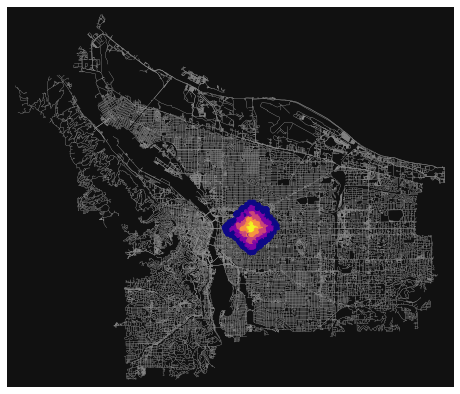

2021-12-20 00:15:30 Finished plotting the graph


In [23]:


# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)



In [24]:
# make the isochrone polygons
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)


2021-12-20 00:16:06 Begin plotting the graph...
2021-12-20 00:16:12 Created edges GeoDataFrame from graph


/Users/calvindechicago/anaconda3/envs/2021_all/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


2021-12-20 00:16:29 Finished plotting the graph


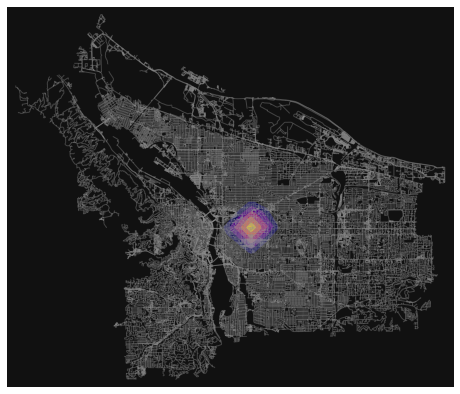

In [25]:


# plot the network then add isochrones as colored descartes polygon patches
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()



2021-12-20 00:17:07 Begin plotting the graph...
2021-12-20 00:17:13 Created edges GeoDataFrame from graph
2021-12-20 00:17:29 Finished plotting the graph


/Users/calvindechicago/anaconda3/envs/2021_all/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


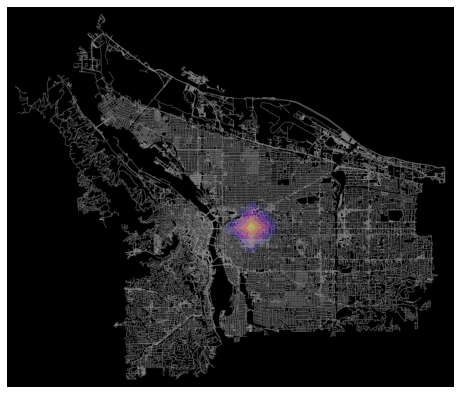

In [26]:
def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': subgraph.nodes()}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(G, show=False, close=False, edge_color='#999999', edge_alpha=0.2,
                        node_size=0, bgcolor='k')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

In [ ]:
# TO DO: 
# 1 DONE join block group pop totals with block group geographies and export
# 2 Make 1/2 mile isochrones for each transit stop and export
# 3 Merge Isochrones
# 4 Create Voronoi Polygons within merged isochrones
# 5 Where Voronoi Polygons overlap multiple blockgroups, find proportion that they overlap and calculate proportional total population.
# 6 join Voronoi Stats with each Stop
# Create Leaflet Layer for Voronoi Polygons and symbolize graduated on ridership capture areas to show high/low areas. 

